Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '11/10/2014'),
             ('cancel_date', '1/14/2015'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'TRUE'),
             ('is_canceled', 'TRUE')])

In [2]:
## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)

daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '1/9/2015'),
             ('num_courses_visited', '1'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0'),
             ('projects_completed', '0')])

In [3]:
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Next function Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
# This date parser assumes - month/date/year format

def parse_date_mdy(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%Y')

# Next function Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
# This date parser assumes - year-month-date format

def parse_date_ymd(date):
    if date == '':
        return None
    else:
        date_string = dt.strptime(date, '%Y-%m-%d').strftime('%m/%d/%Y')
        return dt.strptime(date_string, '%m/%d/%Y')        
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

In [5]:
# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date_mdy(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'TRUE'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'TRUE'
    enrollment['join_date'] = parse_date_mdy(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [6]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del engagement_record['acct']

daily_engagement[0]

OrderedDict([('utc_date', '1/9/2015'),
             ('num_courses_visited', '1'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0'),
             ('projects_completed', '0'),
             ('account_key', '0')])

In [7]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date_mdy(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', '0')])

In [8]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date_ymd(submission['completion_date'])
    submission['creation_date'] = parse_date_ymd(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [9]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

unique_enrollments = get_unique_students(enrollments)
print(len(unique_enrollments))
print(len(enrollments))

unique_daily_engagement = get_unique_students(daily_engagement)
print(len(unique_daily_engagement))
print(len(daily_engagement))

unique_submission = get_unique_students(project_submissions)
print(len(unique_submission))
print(len(project_submissions))

1302
1640
1237
136240
743
3642


# Problems in the Data

## Missing Engagement Records

In [10]:
## Find any student enrollment(s) where the student is missing from the daily engagement table.

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_daily_engagement and enrollment['join_date'] != enrollment['cancel_date']:
        print(student)

#These output accounts are all udacity test accounts.

1304
1304
1101


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts

udacity_test_accounts = set()

for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])

udacity_test_accounts

{'1069', '1101', '1304', '312', '448', '818'}

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


In [42]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

## Refining the Question

In [43]:
## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days (first 7 days are free in udacity). The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}

for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']

# Since a student can enroll multiple times, we need to store the latest enrollment date for students
        
        if account_key not in paid_students or enrollment_date > enrollment['join_date']:
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting Data from First Week

In [44]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [45]:
""" Create a list of rows from the engagement table including only rows where
    the student is one of the paid students you just found, and the date is within
    one week of the student's join date.
"""
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date): # Problem is here because length of other lists is correct.
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1293
134549
3618


6920

## Exploring Student Engagement

In [46]:
from collections import defaultdict
import numpy as np

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

engagement_by_account = defaultdict(list)

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

total_minutes_by_account = {}

for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    
    
# In python3, dict.values returns a dict_values object, which is not a list or tuple. Try coercing that into a list.
total_minutes = list(total_minutes_by_account.values())

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

Mean: 325.7850653949317
Standard deviation: 418.40526409921097
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [47]:
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_mintutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_mintutes = student # student's account_key with maximum minutes stored

# print(max_minutes)

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_mintutes:
        print(engagement_record)

OrderedDict([('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.5193397), ('lessons_completed', 4), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.6339233), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.0189037), ('lessons_completed', 6), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('account_key', '163'), ('has_visited', 1)])
OrderedDict([('utc_date', datetime.datetime(2015, 7, 13, 0, 0)), ('num_courses

## Lessons Completed in First Week

In [48]:
## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.

lessons_by_account = defaultdict(list)

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    lessons_by_account[account_key].append(engagement_record)

# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)

completed_lessons_by_account = {}

for account_key, engagement_for_student in lessons_by_account.items():
    total_lessons = 0
    for engagement_record in engagement_for_student:
        total_lessons += engagement_record['lessons_completed']
    completed_lessons_by_account[account_key] = total_lessons
    
    
# In python3, dict.values returns a dict_values object, which is not a list or tuple. Try coercing that into a list.
total_lessons = list(completed_lessons_by_account.values())

print('Mean:', np.mean(total_lessons))
print('Standard deviation:', np.std(total_lessons))
print('Minimum:', np.min(total_lessons))
print('Maximum:', np.max(total_lessons))

Mean: 1.6904522613065327
Standard deviation: 3.0286171606877743
Minimum: 0
Maximum: 36


## Above 2 blocks of code written using function calls

In [49]:
# import numpy as np

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
# engagement_by_account

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
# total_minutes_by_account

def described_data(data, header): # header is what is the 'title' we need to give this statistics
    updated_data = list(data.values())
    print('Mean:', np.mean(updated_data))
    print('Standard deviation:', np.std(updated_data))
    print('Minimum:', np.min(updated_data))
    print('Maximum:', np.max(updated_data))

described_data(total_minutes, 'Total Minutes')

TOTAL MINUTES :
Mean: 325.7850653949317
Standard deviation: 418.40526409921097
Minimum: 0.0
Maximum: 3564.7332645


## Number of Visits in First Week

In [101]:
## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

days_by_account = group_data(paid_engagement_in_first_week, 'account_key')
# days_by_account

"""
This is that first part solution for which we need to change the sum_grouped_items function.
This function will only return statistics on "number_of_courses" visited.
It does NOT tell about the number of days visited. 

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            if data_point['num_courses_visited'] > 0:
                total += data_point[field_name]
                summed_data[key] = total
    return summed_data
"""

def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
            summed_data[key] = total
    return summed_data

days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')
# days_visited_by_account

def described_data(data, header = '' ): # header is the title we need to give this statistics with default as None
    updated_data = list(data.values())
    print(header)
    print('Mean:', np.mean(updated_data))
    print('Standard deviation:', np.std(updated_data))
    print('Minimum:', np.min(updated_data))
    print('Maximum:', np.max(updated_data))
    
described_data(days_visited_by_account, 'Total Courses Visited')

Total Courses Visited
Mean: 3.0422110552763817
Standard deviation: 2.2300431831405754
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [102]:
## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()
# To store all the account keys of students which passed the project or got distinction at some point of time.

for submission in paid_submissions:
    
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and (rating == 'PASSED' or rating == 'DISTINCTION'):
        pass_subway_project.add(submission['account_key'])

print("Number of passing student IDs :", len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []

# Now we are specifically looking for 'paid_engagements in one week'.
# We have more engagements than the IDs because engagement_record contain multiple records with same account_key.

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print("Number of passing engagements :", len(passing_engagement))
print("Number of non-passing engagements :", len(non_passing_engagement))

Number of passing student IDs : 647
Number of passing engagements : 4528
Number of non-passing engagements : 2392


## Comparing the Two Student Groups

In [108]:
## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

#lessons_completed
#has_visited

passing_engagement_by_account = group_data(passing_engagement, 'account_key')
#passing_engagement_by_account

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
#non_passing_engagement_by_account

passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
described_data(passing_minutes,'Total Minutes Visited for Passing Engagements:')

non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
described_data(non_passing_minutes,'Total Minutes Visited for NON - Passing Engagements:')

print('\n')

passing_lessons = sum_grouped_items(passing_engagement_by_account, 'lessons_completed')
described_data(passing_lessons,'Total Lessons Completed for Passing Engagements:')

non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account, 'lessons_completed')
described_data(non_passing_lessons,'Total Lessons Completed for NON - Passing Engagements:')

print('\n')

passing_visits = sum_grouped_items(passing_engagement_by_account, 'has_visited')
described_data(passing_visits,'Total Visits/Day for Passing Engagements:')

non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
described_data(non_passing_visits,'Total Visits/Day for NON - Passing Engagements:')

Total Minutes Visited for Passing Engagements:
Mean: 418.419087644255
Standard deviation: 451.4461628439436
Minimum: 0.0
Maximum: 3564.7332645
Total Minutes Visited for NON - Passing Engagements:
Mean: 153.56031713254023
Standard deviation: 275.7049201529198
Minimum: 0.0
Maximum: 1768.5227493


Total Lessons Completed for Passing Engagements:
Mean: 2.115919629057187
Standard deviation: 3.157950646243919
Minimum: 0
Maximum: 36
Total Lessons Completed for NON - Passing Engagements:
Mean: 0.8994252873563219
Standard deviation: 2.59280607602387
Minimum: 0
Maximum: 27


Total Visits/Day for Passing Engagements:
Mean: 3.608964451313756
Standard deviation: 2.183989800104125
Minimum: 0
Maximum: 7
Total Visits/Day for NON - Passing Engagements:
Mean: 1.9885057471264367
Standard deviation: 1.9088074924073457
Minimum: 0
Maximum: 7


## Making Histograms

Total Minutes Visited for Passing Engagements:
Mean: 418.419087644255
Standard deviation: 451.4461628439436
Minimum: 0.0
Maximum: 3564.7332645


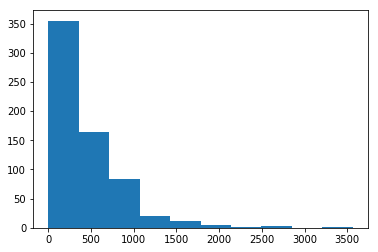

Total Minutes Visited for NON - Passing Engagements:
Mean: 153.56031713254023
Standard deviation: 275.7049201529198
Minimum: 0.0
Maximum: 1768.5227493


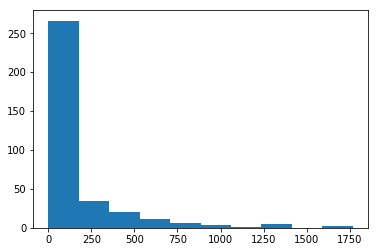

Total Lessons Completed for Passing Engagements:
Mean: 2.115919629057187
Standard deviation: 3.157950646243919
Minimum: 0
Maximum: 36


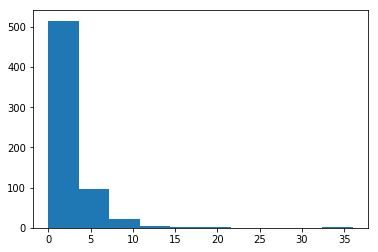

Total Lessons Completed for NON - Passing Engagements:
Mean: 0.8994252873563219
Standard deviation: 2.59280607602387
Minimum: 0
Maximum: 27


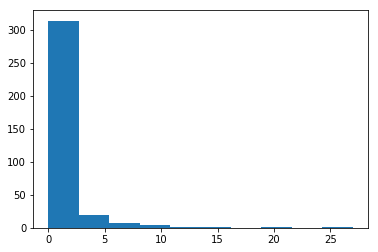

Total Visits/Day for Passing Engagements:
Mean: 3.608964451313756
Standard deviation: 2.183989800104125
Minimum: 0
Maximum: 7


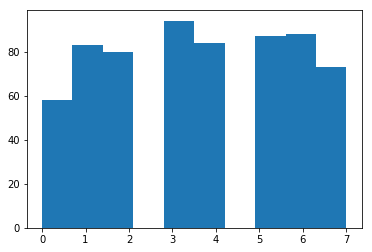

Total Visits/Day for NON - Passing Engagements:
Mean: 1.9885057471264367
Standard deviation: 1.9088074924073457
Minimum: 0
Maximum: 7


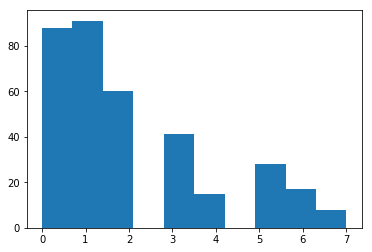

In [125]:
## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline

import matplotlib.pyplot as plt

def described_data(data, header = '' ): # header is the title we need to give this statistics with default as None
    updated_data = list(data.values())
    print(header)
    print('Mean:', np.mean(updated_data))
    print('Standard deviation:', np.std(updated_data))
    print('Minimum:', np.min(updated_data))
    print('Maximum:', np.max(updated_data))
    plt.hist(updated_data)
    plt.show(updated_data) # to show all histograms at once (otherwise only 1 will be shown)

    
described_data(passing_minutes,'Total Minutes Visited for Passing Engagements:')
described_data(non_passing_minutes,'Total Minutes Visited for NON - Passing Engagements:')
described_data(passing_lessons,'Total Lessons Completed for Passing Engagements:')
described_data(non_passing_lessons,'Total Lessons Completed for NON - Passing Engagements:')
described_data(passing_visits,'Total Visits/Day for Passing Engagements:')
described_data(non_passing_visits,'Total Visits/Day for NON - Passing Engagements:')

## Improving Plots and Sharing Findings

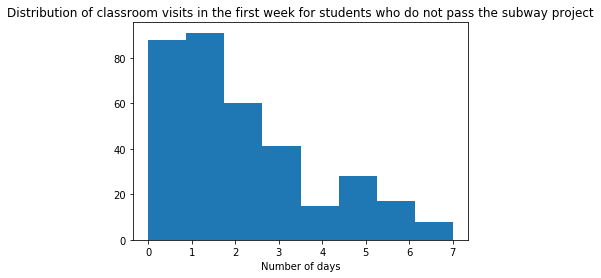

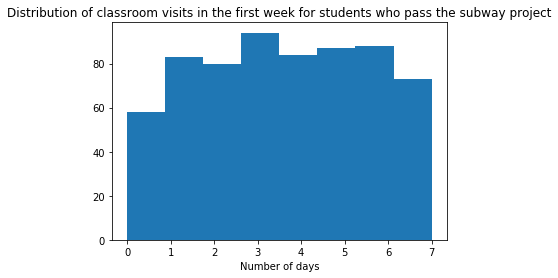

In [132]:
## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')
plt.show()

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

plt.show()